In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from learning_algorithm.viz.plot import plot_decision_regions

In [2]:
flowers = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      header=None)
flowers.loc[flowers[4] == 'Iris-setosa', 4] = 0
flowers.loc[flowers[4] == 'Iris-versicolor', 4] = 1
flowers.loc[flowers[4] == 'Iris-virginica', 4] = 2
flowers[4] = flowers[4].astype('int')

In [3]:
x_combined = flowers.iloc[:, [0, 2]].values
y_combined = flowers.iloc[:, 4].values

In [4]:
# x = extract sepal length and petal length
# y = select setosa and versicolor petal width
x = flowers.iloc[0:100, [0, 2]].values
y = flowers.iloc[0:100, 4].values

In [5]:
# Check that our implementation works
x_train, x_test, y_train, t_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

In [6]:
x_combined_std = np.copy(x_combined)
x_combined_std[:,0] = (x_combined[:,0] - x_combined[:,0].mean()) / x_combined[:,0].std()
x_combined_std[:,1] = (x_combined[:,1] - x_combined[:,1].mean()) / x_combined[:,1].std()

In [7]:
x_train_std = np.copy(x_train)
x_train_std[:,0] = (x_train[:,0] - x_train[:,0].mean()) / x_train[:,0].std()
x_train_std[:,1] = (x_train[:,1] - x_train[:,1].mean()) / x_train[:,1].std()

/Users/facts/Documents/workspaces/github/machine_learning_training/supervised/classification/learning_algorithm/learning_algorithm/viz/plot.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == clazz, 0],


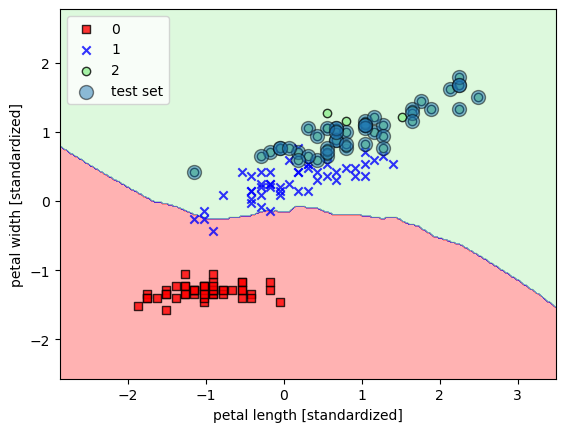

In [10]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)
plot_decision_regions(x_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()